In [ ]:
# Install required packages
!pip install mtcnn tensorflow opencv-python-headless matplotlib tqdm scikit-learn gdown

# Download pre-trained FaceNet model (.h5 Keras version)
!gdown --id 1u1h9ay5v1Pv2WZPYOQpUzdXhWcT7EpiF -O facenet_keras.h5


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.3 MB/s eta 0:00:00
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1u1h9ay5v1Pv2WZPYOQpUzdXhWcT7EpiF

but Gdown can't. Please check connections and permissions.


In [ ]:
!pip install keras-facenet tensorflow opencv-python-headless matplotlib tqdm


  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10367 sha256=f5ae7104d8ee1d248ccede4468889f9c3686d4c45c5ee80aadc676ff80acc556
  Stored in directory: /root/.cache/pip/wheels/05/b0/f5/19ac49fedc10b1df3ee56b096edbcfa39d45794fccc6bcdbbf
Successfully built keras-facenet


In [ ]:
import cv2
import numpy as np
from keras_facenet import FaceNet
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from datetime import timedelta
from tqdm.notebook import tqdm

embedder = FaceNet()
THRESHOLD = 0.6
FRAME_SKIP = 10

def load_ref(path):
    img = cv2.imread(path)
    if img is None:
        raise ValueError("Reference image not found")
    detections = embedder.extract(img, threshold=0.95)
    if not detections:
        raise ValueError("No face detected")
    return detections[0]["embedding"]

def process_video(video_path, ref_emb):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    matches = []
    frame_num = 0

    pbar = tqdm(total=total_frames, desc="🔍 Processing")
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_num += 1
        if frame_num % FRAME_SKIP != 0:
            pbar.update(1)
            continue
        results = embedder.extract(frame)
        for det in results:
            emb = det["embedding"]
            sim = cosine_similarity([emb], [ref_emb])[0][0]
            if sim > THRESHOLD:
                matches.append({
                    "frame": frame.copy(),
                    "bbox": det["box"],
                    "similarity": sim,
                    "timestamp": frame_num / fps
                })
        pbar.update(1)
    cap.release()
    pbar.close()
    return matches, fps

def display_results(matches, fps):
    if not matches:
        print("❌ No matches found")
        return
    matches.sort(key=lambda x: x["timestamp"])
    plt.figure(figsize=(15, 8))
    for i, match in enumerate(matches[:6]):
        frame = match["frame"]
        x, y, w, h = match["bbox"]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        plt.subplot(2, 3, i+1)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title(f"Sim: {match['similarity']:.2f}\nTime: {timedelta(seconds=match['timestamp'])}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()


In [ ]:
!nvidia-smi


Tue Oct  7 08:48:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P0             28W /   70W |     230MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

📤 Upload reference image:


Saving Screenshot 2025-08-10 211957.png to Screenshot 2025-08-10 211957.png
📤 Upload video file:


Saving WhatsApp Video 2025-06-09 at 12.04.51 PM.mp4 to WhatsApp Video 2025-06-09 at 12.04.51 PM (1).mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


🔍 Processing:   0%|          | 0/447 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


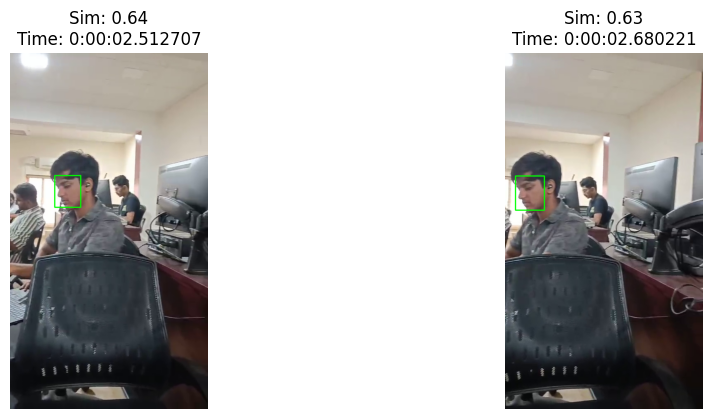

In [ ]:
from google.colab import files

print("📤 Upload reference image:")
ref = files.upload()

print("📤 Upload video file:")
vid = files.upload()

ref_path = next(iter(ref))
vid_path = next(iter(vid))

ref_emb = load_ref(ref_path)
matches, fps = process_video(vid_path, ref_emb)
display_results(matches, fps)
